# Clasificación Machine Learning - Iris Dataset

In [2]:
# Importar las Librerías
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargar el dataset
iris = load_iris()

In [4]:
# Convertir a DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [5]:
# Mapear las especies (0, 1, 2) a nombres
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [6]:
# Visualizar las primeras filas
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [7]:
# Información del dataset
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
# Datos Estadísticos del Dataset
print("\nMedidas Estadísticas:")
print(data.describe())


Medidas Estadísticas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [9]:
# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [10]:
# Conocer la estructura del dataset
print("Columnas del dataset:")
print(data.columns)

Columnas del dataset:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


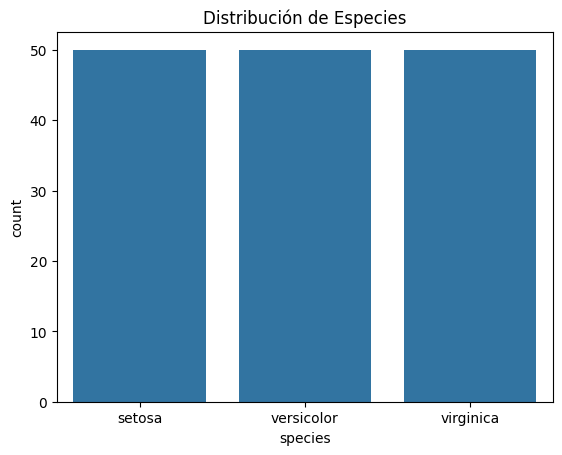

In [11]:
# Distribución de las especies
sns.countplot(x='species', data=data)
plt.title("Distribución de Especies")
plt.show()

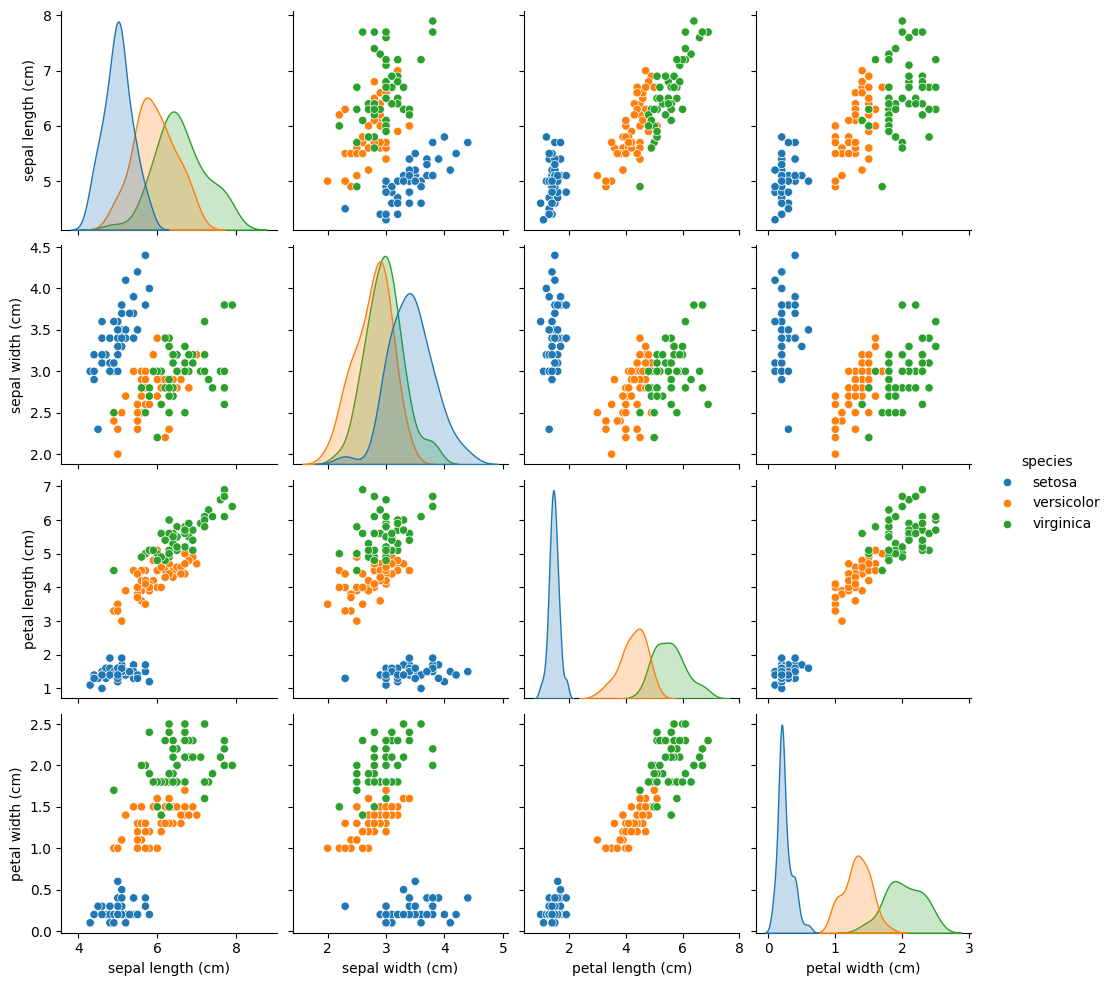

In [12]:
# Visualizar la relación entre las caracteristicas
sns.pairplot(data, hue='species', diag_kind='kde')
plt.show()

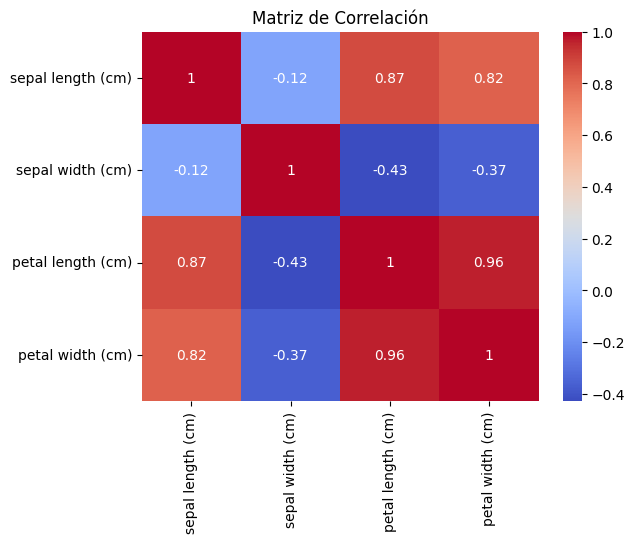

In [15]:
# Seleccionar únicamente las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular y graficar la matriz de correlación
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [16]:
# Separar las características (X) y la etiqueta (y)
from sklearn.model_selection import train_test_split

X = data.drop('species', axis=1)  # Variables independientes
y = data['species']  # Variable dependiente

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmar las dimensiones
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

X_train: (120, 4), X_test: (30, 4)


In [17]:
# Entrenar un Modelo de Clasificación - Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


In [18]:
# Evaluar el Modelo
from sklearn.metrics import classification_report, confusion_matrix

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



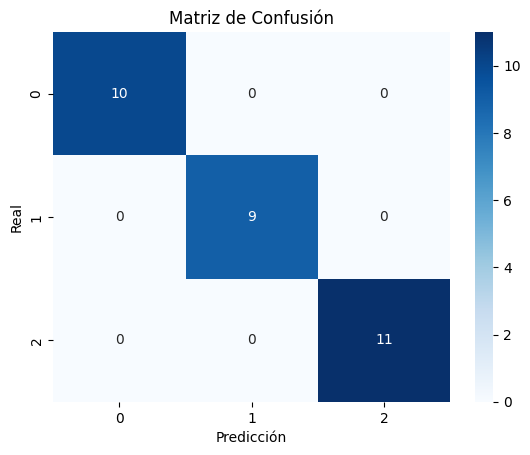

In [19]:
# Visualización de la Matriz de Confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [20]:
# Optimización del Modelo
from sklearn.model_selection import GridSearchCV

# Definir el rango de parámetros
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el mejor modelo
y_pred_optimized = best_model.predict(X_test)
print("\nReporte de Clasificación (Modelo Optimizado):")
print(classification_report(y_test, y_pred_optimized))

Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Reporte de Clasificación (Modelo Optimizado):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



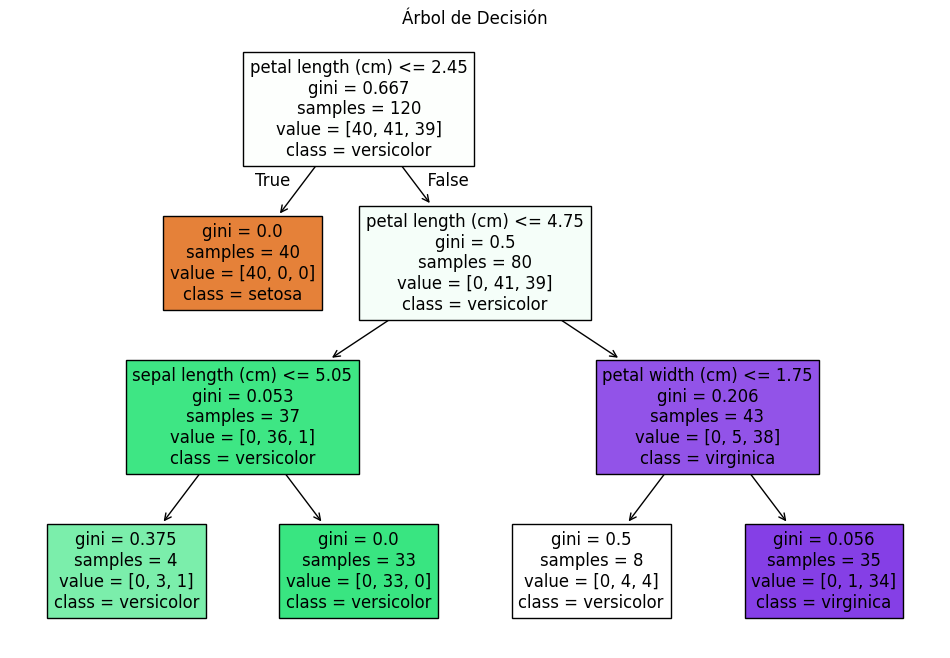

In [21]:
# Visualización del Árbol de Decisión
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Árbol de Decisión")
plt.show()

# Resumen Ejecutivo - Análisis del Conjunto de Datos Iris

## Objetivo
El propósito de este análisis es explorar el conjunto de datos **Iris**, realizar un análisis exploratorio de datos (EDA), entrenar un modelo de clasificación mediante un árbol de decisión y optimizar su rendimiento mediante validación cruzada.

---

## Puntos Clave del Análisis

### 1. **Descripción de los Datos**
- **Dataset**: Iris (flores clasificadas en tres especies: Setosa, Versicolor y Virginica).
- **Número de muestras**: 150.
- **Columnas**: 
  - Longitud y ancho del sépalo.
  - Longitud y ancho del pétalo.
  - Especie (variable objetivo).
- **No se encontraron valores nulos**.

---

### 2. **Análisis Exploratorio de Datos (EDA)**
#### **Distribución de las Especies**
- Las tres especies están balanceadas, cada una cuenta con 50 muestras.

#### **Relaciones entre las Variables**
- Se visualizó una matriz de dispersión entre las características, revelando:
  - Relaciones lineales positivas entre longitud y ancho de los pétalos y sépalos.
  - Diferenciación clara entre especies en las dimensiones de los pétalos.

#### **Correlación**
- Las dimensiones de los pétalos tienen una fuerte correlación positiva.
- Correlaciones más débiles entre las dimensiones del sépalo.

---

### 3. **Entrenamiento del Modelo**
#### **Modelo Utilizado**
- Árbol de Decisión.
- Dividimos los datos en entrenamiento (80%) y prueba (20%).

#### **Resultados del Modelo Inicial**
- **Matriz de Confusión**:
  - Clasificación perfecta: 100% de precisión, recall y F1-score para todas las especies.

#### **Optimización del Modelo**
- Se utilizó **GridSearchCV** para optimizar hiperparámetros:
  - Parámetros ajustados: `max_depth`, `min_samples_split`, `min_samples_leaf`.
  - Mejor combinación encontrada: 
    - `max_depth=3`
    - `min_samples_split=2`
    - `min_samples_leaf=4`.

#### **Resultados del Modelo Optimizado**
- Mantuvo una precisión perfecta del 100% en los datos de prueba.

---

### 4. **Visualizaciones**
#### **Gráficos Clave**
1. **Distribución de las Especies**: Cada especie tiene la misma proporción en el dataset.
2. **Relaciones entre Variables**: Las especies se separan claramente en el espacio de las dimensiones de pétalos y sépalos.
3. **Matriz de Correlación**: Relación positiva fuerte entre las variables de los pétalos.
4. **Árbol de Decisión Visualizado**: Claramente muestra las reglas de clasificación con base en las dimensiones de los pétalos y sépalos.

---

## Conclusiones
1. El conjunto de datos Iris presenta una clara separación entre las especies basada en las dimensiones de los pétalos y sépalos.
2. El modelo de árbol de decisión, incluso sin optimización, logró un 100% de precisión debido a la simplicidad y separación de los datos.
3. La optimización mediante GridSearch no mejoró la precisión pero identificó hiperparámetros más ajustados para una generalización robusta.

## Recomendaciones
- Este análisis puede servir como base para introducir técnicas de clasificación.
- Considerar extender el análisis a métodos más complejos como Random Forest o SVM para comparar rendimiento.
- Aplicar técnicas similares a conjuntos de datos más grandes y desbalanceados para evaluar la capacidad de generalización.

---